## データセット修正前
epochs=100　SGD　test_acc: 0.584375  
epochs=200　SGD　test_acc: 0.678125  
epochs=70　 Adam test_acc: 0.80625  

## データセット修正後
epochs=300　SGD　test_acc: 0.78807946940921  
epochs=70   Adam test_acc: 0.8178807939125212

# 学習：データセット修正前 SGD
epoch : 100

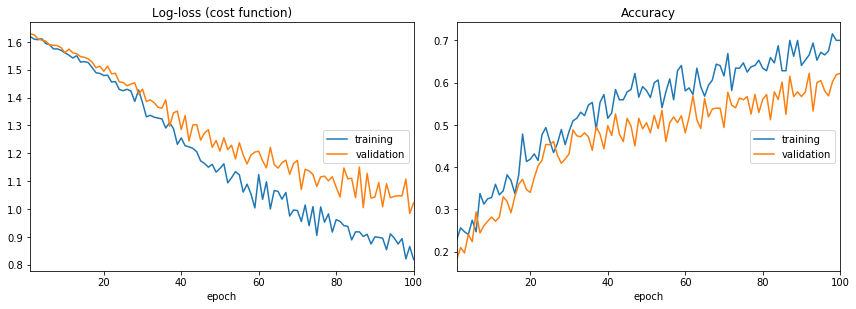

Log-loss (cost function):
training   (min:    0.819, max:    1.619, cur:    0.819)
validation (min:    0.984, max:    1.629, cur:    1.022)

Accuracy:
training   (min:    0.228, max:    0.716, cur:    0.700)
validation (min:    0.181, max:    0.622, cur:    0.622)


In [6]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D,Input
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.callbacks import CSVLogger
%matplotlib inline

n_categories=5
batch_size=32
train_dir = '/home/ubuntu/images2/train'
validation_dir = '/home/ubuntu/images2/val'
file_name='vgg16_anime_fine'

base_model=VGG16(weights='imagenet',include_top=False,
                 input_tensor=Input(shape=(224,224,3)))

#add new layers instead of FC networks
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
prediction=Dense(n_categories,activation='softmax')(x)
model=Model(inputs=base_model.input,outputs=prediction)

#fix weights before VGG16 14layers
for layer in base_model.layers[:15]:
    layer.trainable=False

model.compile(optimizer=SGD(lr=0.0001,momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

#save model
json_string=model.to_json()
open(file_name+'.json','w').write(json_string)

train_datagen=ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen=ImageDataGenerator(rescale=1.0/255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator=validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

hist=model.fit_generator(train_generator,
                         steps_per_epoch=10,
                         epochs=100,
                         verbose=1,
                         validation_data=validation_generator,
                         validation_steps=10,
                         callbacks=[CSVLogger(file_name+'.csv'),PlotLossesCallback()])

#save weights
model.save(file_name+'.h5')

# 予測 ：データセット修正前 SGD
test_acc: 0.584375

Found 389 images belonging to 5 classes.

 test loss: 1.0390549719333648

 test_acc: 0.584375


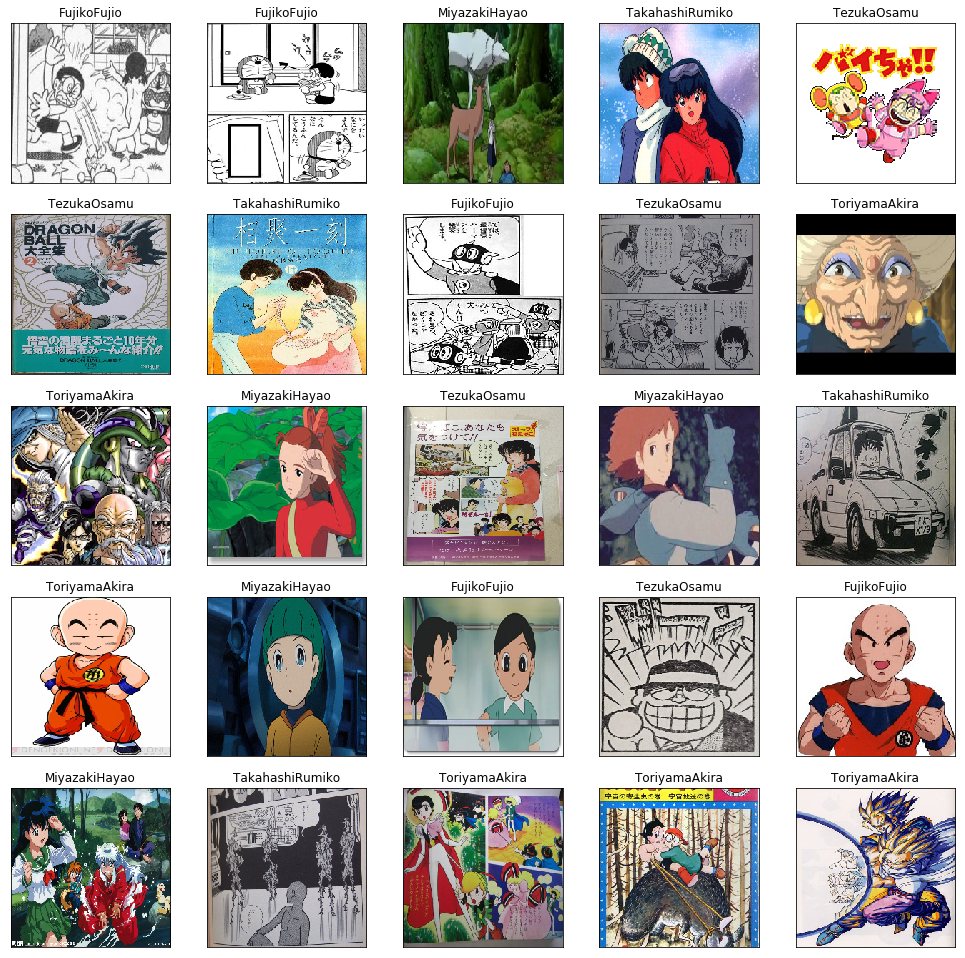

In [11]:
from keras.models import model_from_json
import matplotlib.pyplot as plt
import numpy as np
import os,random
from keras.preprocessing.image import img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD

batch_size=32
file_name='vgg16_anime_fine'
test_dir = '/home/ubuntu/images2/test'
display_dir = '/home/ubuntu/images2/display'
label = ['FujikoFujio', 'MiyazakiHayao', 'TakahashiRumiko','TezukaOsamu','ToriyamaAkira']

#load model and weights
json_string=open(file_name+'.json').read()
model=model_from_json(json_string)
model.load_weights(file_name+'.h5')

model.compile(optimizer=SGD(lr=0.0001,momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#data generate
test_datagen=ImageDataGenerator(rescale=1.0/255)

test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

#evaluate model
score = model.evaluate_generator(test_generator, steps=10)
print('\n test loss:',score[0])
print('\n test_acc:',score[1])

#predict model and display images
files=os.listdir(display_dir)
#print("files:",files)
img=random.sample(files,25)
#print("img:",img)

plt.figure(figsize=(17,17))
for i in range(25):
    temp_img=load_img(os.path.join(display_dir,img[i]),target_size=(224,224))
    #print("temp_img:", temp_img)
    plt.subplot(5,5,i+1)
    plt.imshow(temp_img)
    #Images normalization
    temp_img_array=img_to_array(temp_img)
    temp_img_array=temp_img_array.astype('float32')/255.0
    temp_img_array=temp_img_array.reshape((1,224,224,3))
    #predict image
    img_pred=model.predict(temp_img_array)
    plt.title(label[np.argmax(img_pred)])
    #eliminate xticks,yticks
    plt.xticks([]),plt.yticks([])

plt.show()

# 学習：データセット修正前 SGD
epoch : 200

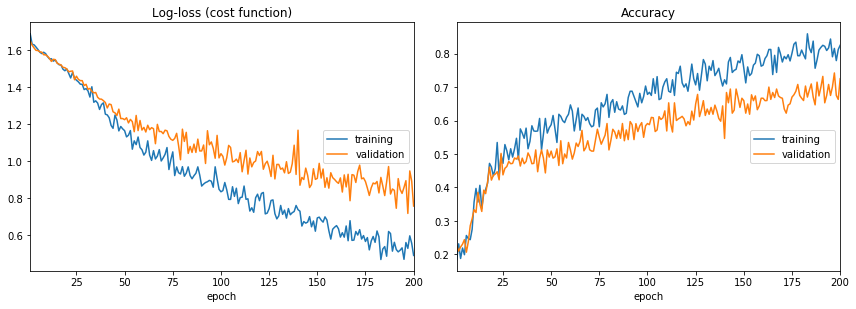

Log-loss (cost function):
training   (min:    0.469, max:    1.689, cur:    0.491)
validation (min:    0.718, max:    1.651, cur:    0.758)

Accuracy:
training   (min:    0.184, max:    0.859, cur:    0.825)
validation (min:    0.206, max:    0.742, cur:    0.725)


In [12]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D,Input
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.callbacks import CSVLogger

n_categories=5
batch_size=32
train_dir = '/home/ubuntu/images2/train'
validation_dir = '/home/ubuntu/images2/val'
file_name='vgg16_anime2_fine'

base_model=VGG16(weights='imagenet',include_top=False,
                 input_tensor=Input(shape=(224,224,3)))

#add new layers instead of FC networks
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
prediction=Dense(n_categories,activation='softmax')(x)
model=Model(inputs=base_model.input,outputs=prediction)

#fix weights before VGG16 14layers
for layer in base_model.layers[:15]:
    layer.trainable=False

model.compile(optimizer=SGD(lr=0.0001,momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

#save model
json_string=model.to_json()
open(file_name+'.json','w').write(json_string)

train_datagen=ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen=ImageDataGenerator(rescale=1.0/255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator=validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

hist=model.fit_generator(train_generator,
                         steps_per_epoch=10,
                         epochs=200,
                         verbose=1,
                         validation_data=validation_generator,
                         validation_steps=10,
                         callbacks=[CSVLogger(file_name+'.csv'),PlotLossesCallback()])

#save weights
model.save(file_name+'.h5')



# 予測：データセット修正前 SGD
test_acc: 0.678125

Found 389 images belonging to 5 classes.

 test loss: 0.8637231409549713

 test_acc: 0.678125


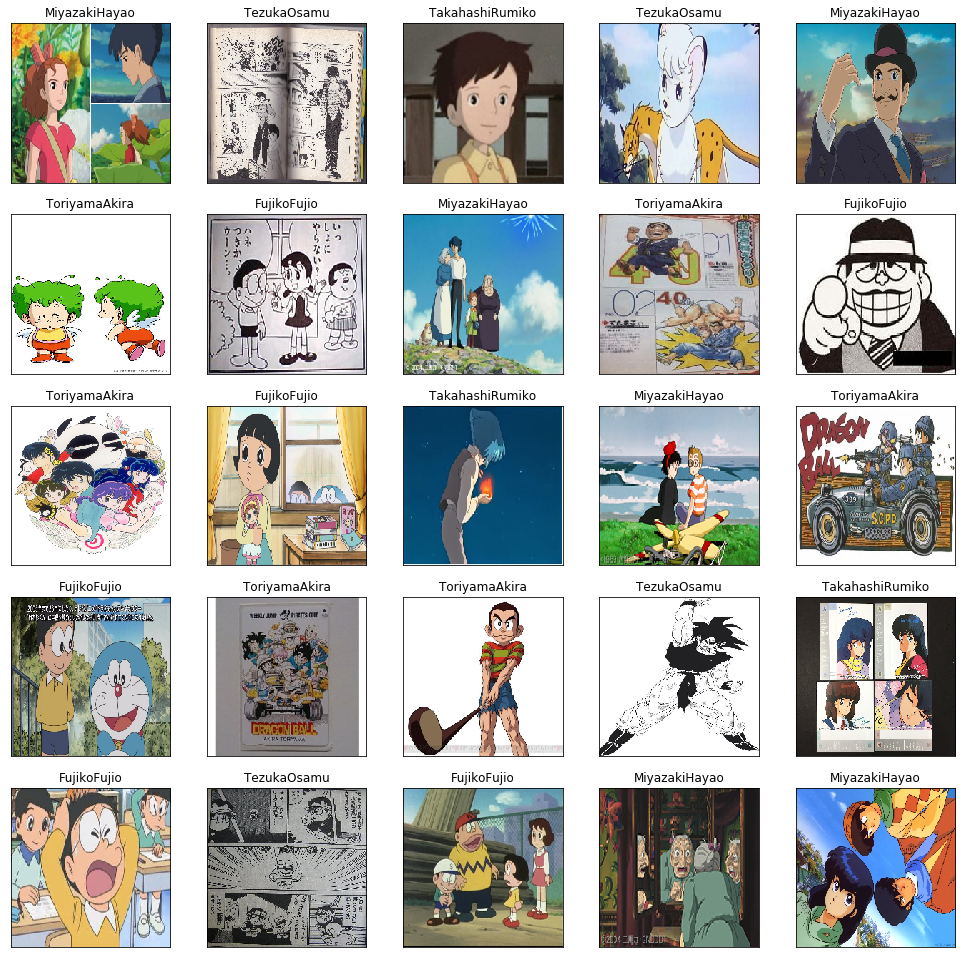

In [13]:
from keras.models import model_from_json
import matplotlib.pyplot as plt
import numpy as np
import os,random
from keras.preprocessing.image import img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD

batch_size=32
file_name='vgg16_anime2_fine'
test_dir = '/home/ubuntu/images2/test'
display_dir = '/home/ubuntu/images2/display'
label = ['FujikoFujio', 'MiyazakiHayao', 'TakahashiRumiko','TezukaOsamu','ToriyamaAkira']

#load model and weights
json_string=open(file_name+'.json').read()
model=model_from_json(json_string)
model.load_weights(file_name+'.h5')

model.compile(optimizer=SGD(lr=0.0001,momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#data generate
test_datagen=ImageDataGenerator(rescale=1.0/255)

test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

#evaluate model
score = model.evaluate_generator(test_generator, steps=10)
print('\n test loss:',score[0])
print('\n test_acc:',score[1])

#predict model and display images
files=os.listdir(display_dir)
#print("files:",files)
img=random.sample(files,25)
#print("img:",img)

plt.figure(figsize=(17,17))
for i in range(25):
    temp_img=load_img(os.path.join(display_dir,img[i]),target_size=(224,224))
    #print("temp_img:", temp_img)
    plt.subplot(5,5,i+1)
    plt.imshow(temp_img)
    #Images normalization
    temp_img_array=img_to_array(temp_img)
    temp_img_array=temp_img_array.astype('float32')/255.0
    temp_img_array=temp_img_array.reshape((1,224,224,3))
    #predict image
    img_pred=model.predict(temp_img_array)
    plt.title(label[np.argmax(img_pred)])
    #eliminate xticks,yticks
    plt.xticks([]),plt.yticks([])

plt.show()

# 学習：データセット修正前 Adam
epoch : 70

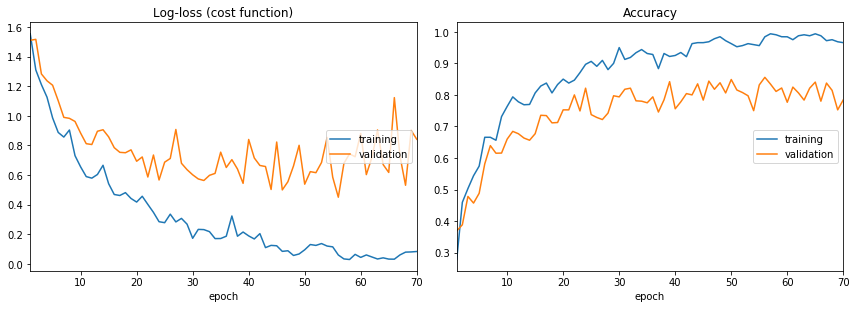

Log-loss (cost function):
training   (min:    0.030, max:    1.554, cur:    0.084)
validation (min:    0.450, max:    1.517, cur:    0.842)

Accuracy:
training   (min:    0.278, max:    0.994, cur:    0.966)
validation (min:    0.369, max:    0.856, cur:    0.784)


In [17]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D,Input
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, Adam
from keras.callbacks import CSVLogger

n_categories=5
batch_size=32
train_dir = '/home/ubuntu/images2/train'
validation_dir = '/home/ubuntu/images2/val'
file_name='vgg16_anime3_fine'

base_model=VGG16(weights='imagenet',include_top=False,
                 input_tensor=Input(shape=(224,224,3)))

#add new layers instead of FC networks
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
prediction=Dense(n_categories,activation='softmax')(x)
model=Model(inputs=base_model.input,outputs=prediction)

#fix weights before VGG16 14layers
for layer in base_model.layers[:15]:
    layer.trainable=False

model.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

#save model
json_string=model.to_json()
open(file_name+'.json','w').write(json_string)

train_datagen=ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen=ImageDataGenerator(rescale=1.0/255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator=validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

hist=model.fit_generator(train_generator,
                         steps_per_epoch=10,
                         epochs=70,
                         verbose=1,
                         validation_data=validation_generator,
                         validation_steps=10,
                         callbacks=[CSVLogger(file_name+'.csv'),PlotLossesCallback()])

#save weights
model.save(file_name+'.h5')

# 予測：データセット修正前 Adam
test_acc: 0.80625

Found 389 images belonging to 5 classes.

 test loss: 0.7784505665302277

 test_acc: 0.80625


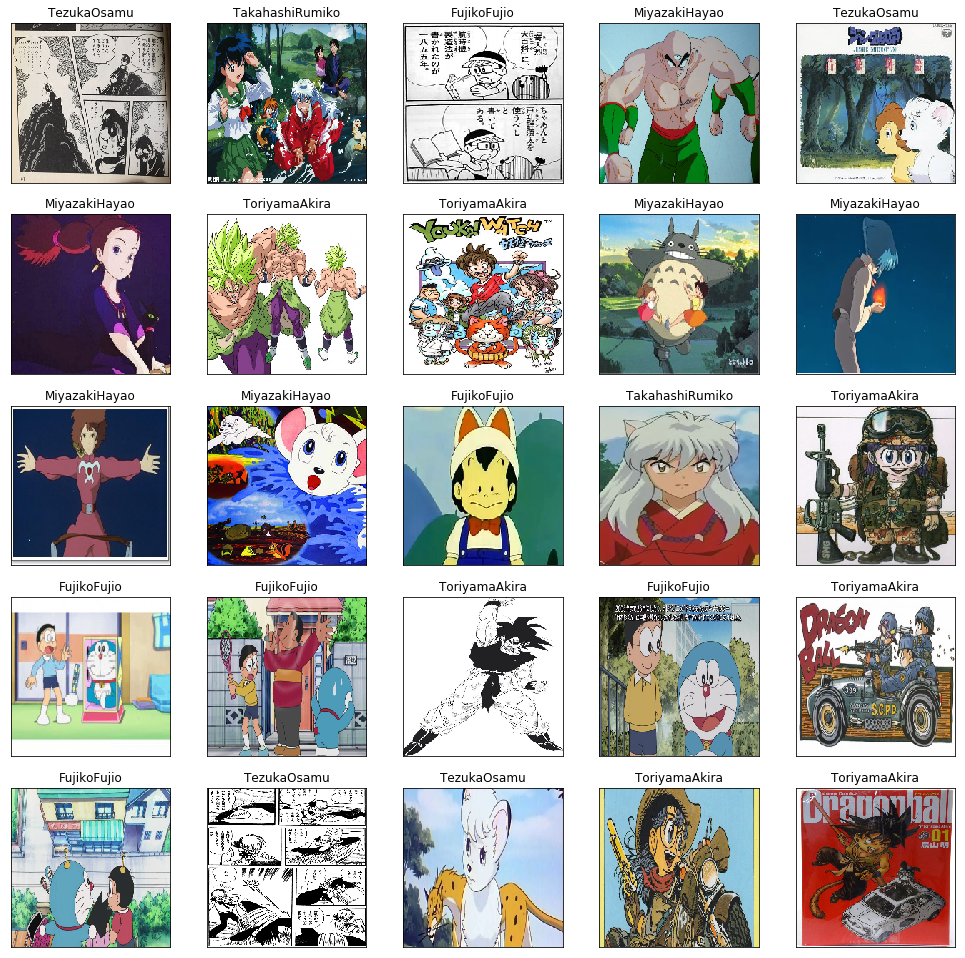

In [24]:
from keras.models import model_from_json
import matplotlib.pyplot as plt
import numpy as np
import os,random
from keras.preprocessing.image import img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam

batch_size=32
file_name='vgg16_anime3_fine'
test_dir = '/home/ubuntu/images2/test'
display_dir = '/home/ubuntu/images2/display'
label = ['FujikoFujio', 'MiyazakiHayao', 'TakahashiRumiko','TezukaOsamu','ToriyamaAkira']

#load model and weights
json_string=open(file_name+'.json').read()
model=model_from_json(json_string)
model.load_weights(file_name+'.h5')

model.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#data generate
test_datagen=ImageDataGenerator(rescale=1.0/255)

test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

#evaluate model
score = model.evaluate_generator(test_generator, steps=10)
print('\n test loss:',score[0])
print('\n test_acc:',score[1])

#predict model and display images
files=os.listdir(display_dir)
img=random.sample(files,25)

plt.figure(figsize=(17,17))
for i in range(25):
    temp_img=load_img(os.path.join(display_dir,img[i]),target_size=(224,224))
    plt.subplot(5,5,i+1)
    plt.imshow(temp_img)
    #Images normalization
    temp_img_array=img_to_array(temp_img)
    temp_img_array=temp_img_array.astype('float32')/255.0
    temp_img_array=temp_img_array.reshape((1,224,224,3))
    #predict image
    img_pred=model.predict(temp_img_array)
    plt.title(label[np.argmax(img_pred)])
    #eliminate xticks,yticks
    plt.xticks([]),plt.yticks([])

plt.show()

# データセット修正後 SGD
epoch : 300

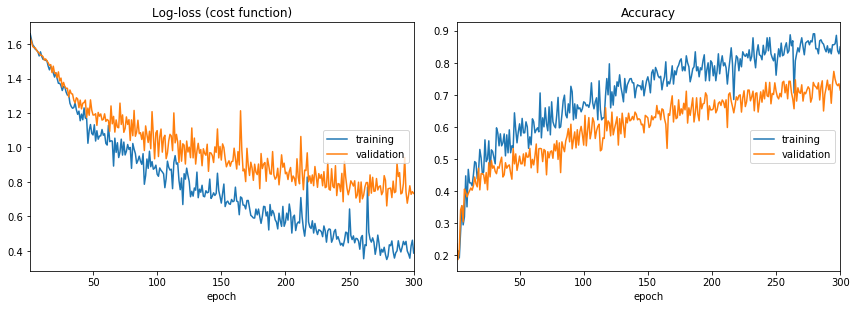

Log-loss (cost function):
training   (min:    0.350, max:    1.660, cur:    0.387)
validation (min:    0.661, max:    1.637, cur:    0.733)

Accuracy:
training   (min:    0.191, max:    0.891, cur:    0.850)
validation (min:    0.186, max:    0.773, cur:    0.715)


In [4]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D,Input
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.callbacks import CSVLogger
from livelossplot.keras import PlotLossesCallback
%matplotlib inline

n_categories=5
batch_size=32
train_dir = '/home/ubuntu/images3/train'
validation_dir = '/home/ubuntu/images3/val'
file_name='vgg16_anime3_fine'

base_model=VGG16(weights='imagenet',include_top=False,
                 input_tensor=Input(shape=(224,224,3)))

#add new layers instead of FC networks
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
prediction=Dense(n_categories,activation='softmax')(x)
model=Model(inputs=base_model.input,outputs=prediction)

#fix weights before VGG16 14layers
for layer in base_model.layers[:15]:
    layer.trainable=False

model.compile(optimizer=SGD(lr=0.0001,momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

#save model
json_string=model.to_json()
open(file_name+'.json','w').write(json_string)

train_datagen=ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen=ImageDataGenerator(rescale=1.0/255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator=validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

hist=model.fit_generator(train_generator,
                         steps_per_epoch=10,
                         epochs=300,
                         verbose=1,
                         validation_data=validation_generator,
                         validation_steps=10,
                         callbacks=[CSVLogger(file_name+'.csv'),PlotLossesCallback()])

#save weights
model.save(file_name+'.h5')

# 予測 ：データセット修正後 SGD
test_acc: 0.78807946940921

Found 174 images belonging to 5 classes.

 test loss: 0.7583818869874966

 test_acc: 0.78807946940921


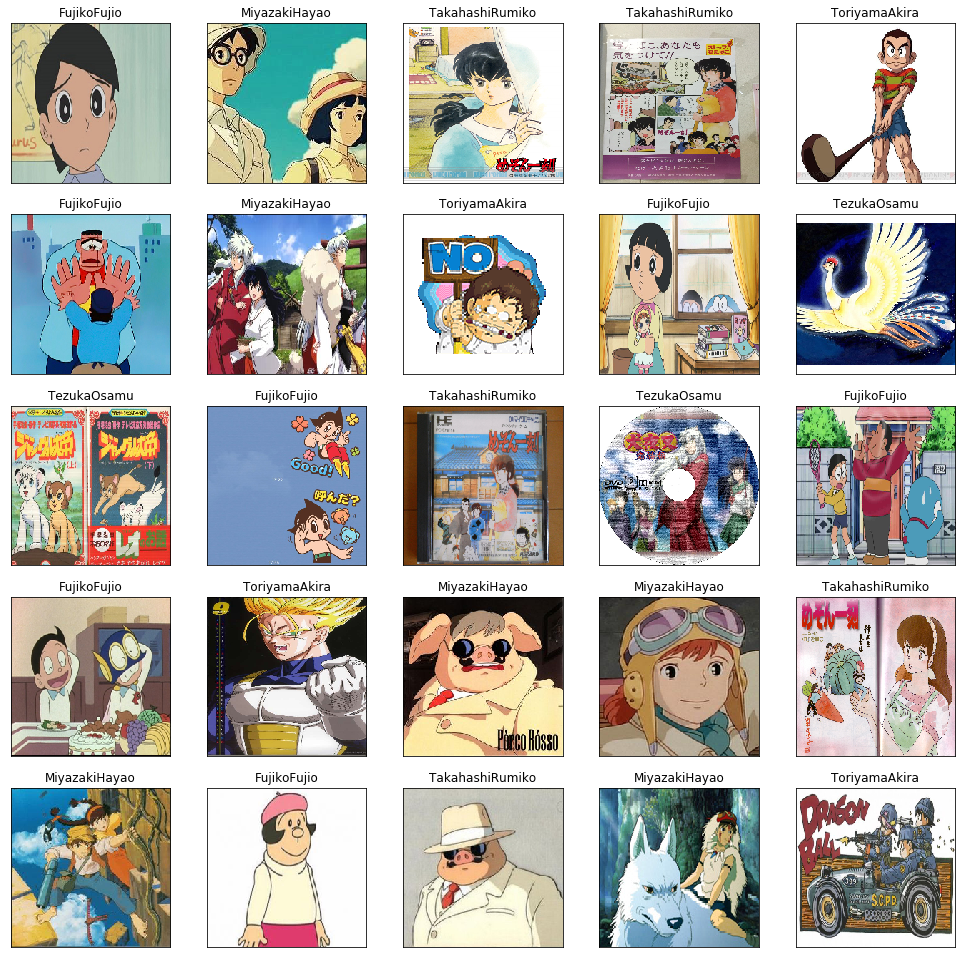

In [5]:
from keras.models import model_from_json
import matplotlib.pyplot as plt
import numpy as np
import os,random
from keras.preprocessing.image import img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam

batch_size=32
file_name='vgg16_anime3_fine'
test_dir = '/home/ubuntu/images3/test'
display_dir = '/home/ubuntu/images3/display'
label = ['FujikoFujio', 'MiyazakiHayao', 'TakahashiRumiko','TezukaOsamu','ToriyamaAkira']

#load model and weights
json_string=open(file_name+'.json').read()
model=model_from_json(json_string)
model.load_weights(file_name+'.h5')

model.compile(optimizer=SGD(lr=0.0001,momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#data generate
test_datagen=ImageDataGenerator(rescale=1.0/255)

test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

#evaluate model
score = model.evaluate_generator(test_generator, steps=10)
print('\n test loss:',score[0])
print('\n test_acc:',score[1])

#predict model and display images
files=os.listdir(display_dir)
img=random.sample(files,25)

plt.figure(figsize=(17,17))
for i in range(25):
    temp_img=load_img(os.path.join(display_dir,img[i]),target_size=(224,224))
    plt.subplot(5,5,i+1)
    plt.imshow(temp_img)
    #Images normalization
    temp_img_array=img_to_array(temp_img)
    temp_img_array=temp_img_array.astype('float32')/255.0
    temp_img_array=temp_img_array.reshape((1,224,224,3))
    #predict image
    img_pred=model.predict(temp_img_array)
    plt.title(label[np.argmax(img_pred)])
    #eliminate xticks,yticks
    plt.xticks([]),plt.yticks([])

plt.show()

# 学習：データセット修正後 Adam
epoch : 70

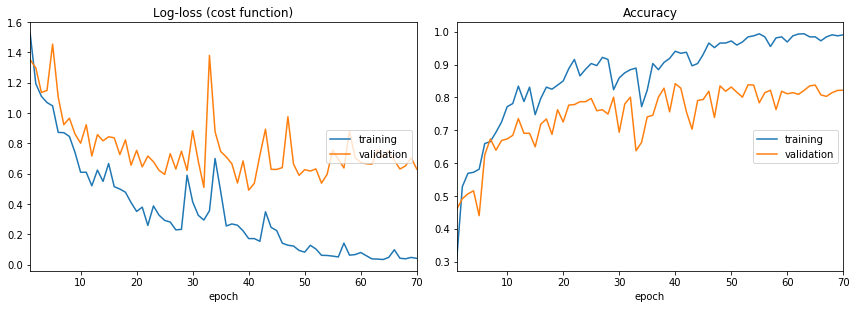

Log-loss (cost function):
training   (min:    0.033, max:    1.522, cur:    0.041)
validation (min:    0.491, max:    1.454, cur:    0.630)

Accuracy:
training   (min:    0.306, max:    0.994, cur:    0.991)
validation (min:    0.440, max:    0.842, cur:    0.822)


In [6]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D,Input
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD, Adam
from keras.callbacks import CSVLogger
%matplotlib inline

n_categories=5
batch_size=32
train_dir = '/home/ubuntu/images3/train'
validation_dir = '/home/ubuntu/images3/val'
file_name='vgg16_anime3-2_fine'

base_model=VGG16(weights='imagenet',include_top=False,
                 input_tensor=Input(shape=(224,224,3)))

#add new layers instead of FC networks
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
prediction=Dense(n_categories,activation='softmax')(x)
model=Model(inputs=base_model.input,outputs=prediction)

#fix weights before VGG16 14layers
for layer in base_model.layers[:15]:
    layer.trainable=False

model.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

#save model
json_string=model.to_json()
open(file_name+'.json','w').write(json_string)

train_datagen=ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen=ImageDataGenerator(rescale=1.0/255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator=validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

hist=model.fit_generator(train_generator,
                         steps_per_epoch=10,
                         epochs=70,
                         verbose=1,
                         validation_data=validation_generator,
                         validation_steps=10,
                         callbacks=[CSVLogger(file_name+'.csv'),PlotLossesCallback()])

#save weights
model.save(file_name+'.h5')

# 予測 ：データセット修正後 Adam
test_acc: 0.8145695372133066

Found 174 images belonging to 5 classes.

 test loss: 0.6522523539745255

 test_acc: 0.8178807939125212


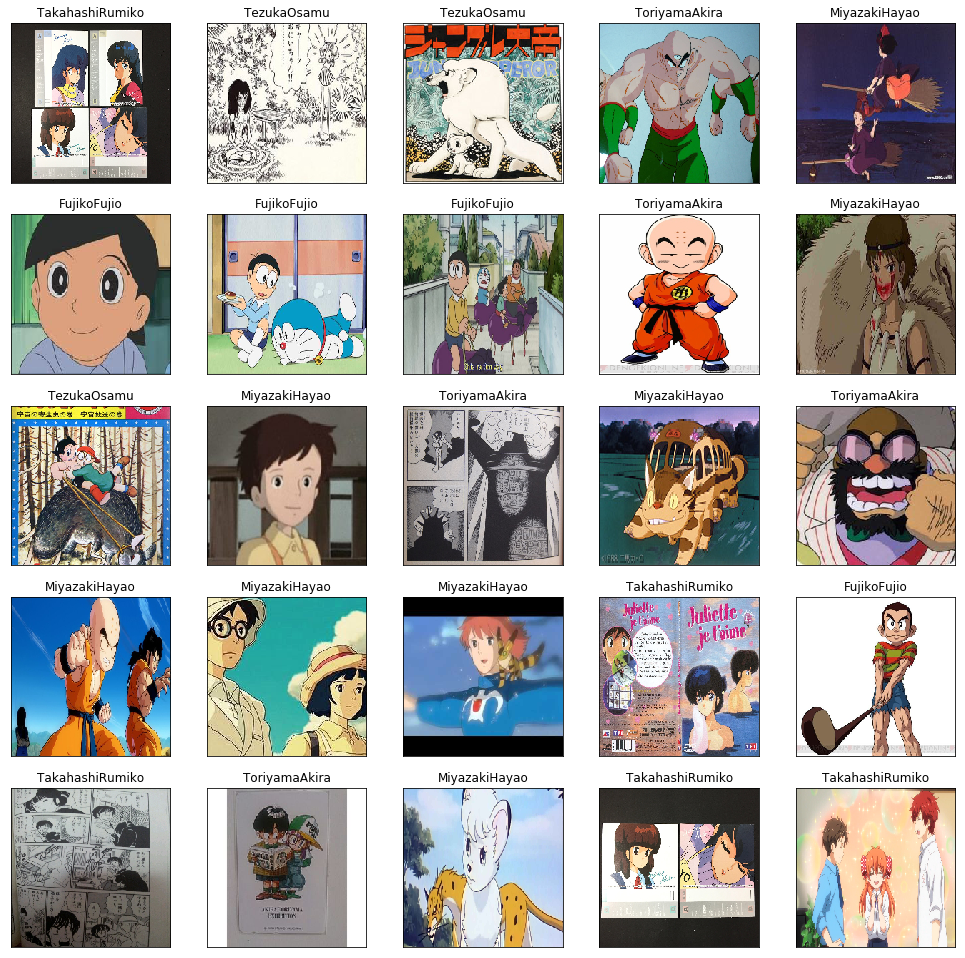

In [23]:
from keras.models import model_from_json
import matplotlib.pyplot as plt
import numpy as np
import os,random
from keras.preprocessing.image import img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam

batch_size=32
file_name='vgg16_anime3-2_fine'
test_dir = '/home/ubuntu/images3/test'
display_dir = '/home/ubuntu/images3/display'
label = ['FujikoFujio', 'MiyazakiHayao', 'TakahashiRumiko','TezukaOsamu','ToriyamaAkira']

#load model and weights
json_string=open(file_name+'.json').read()
model=model_from_json(json_string)
model.load_weights(file_name+'.h5')

model.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#data generate
test_datagen=ImageDataGenerator(rescale=1.0/255)

test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

#evaluate model
score = model.evaluate_generator(test_generator, steps=10)
print('\n test loss:',score[0])
print('\n test_acc:',score[1])

#predict model and display images
files=os.listdir(display_dir)
img=random.sample(files,25)

plt.figure(figsize=(17,17))
for i in range(25):
    temp_img=load_img(os.path.join(display_dir,img[i]),target_size=(224,224))
    plt.subplot(5,5,i+1)
    plt.imshow(temp_img)
    #Images normalization
    temp_img_array=img_to_array(temp_img)
    temp_img_array=temp_img_array.astype('float32')/255.0
    temp_img_array=temp_img_array.reshape((1,224,224,3))
    #predict image
    img_pred=model.predict(temp_img_array)
    plt.title(label[np.argmax(img_pred)])
    #eliminate xticks,yticks
    plt.xticks([]),plt.yticks([])

plt.show()